# Hyun Ki Kim

# 11/06/2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.mlab as mlab

# 1. Simulating income path

In [2]:
simulation_profile = {
    'starting_income'    : 80000,
    'growth_rate'        : 0.03,
    'mu'                 : 0,
    'sigma'              : 0.1,
    'rho'                : 0.2,
    'start_year'         : 2019,
    'working_years'      : 40,
    'number_of_draws'    : 10000,
    'loan_amount'        : 95000,
    'pay_off_rate'       : 0.1,
    'seed'               : 524,
    }

In [3]:
def normal_income_simulation(p):
    
    # Generating random errors
    np.random.seed(p['seed'])
    normal_errors = np.random.normal(p['mu'], p['sigma'], p['number_of_draws'] *\
                                     p['working_years']).reshape(p['working_years'],
                                                                 p['number_of_draws'])
    
    # Initializing matrix with zeros
    ln_income_matrix = np.zeros((p['working_years'], p['number_of_draws']))
    
    # Log income for year 2019
    ln_income_matrix[0, :] = np.log(p['starting_income']) + normal_errors[0, :]
    
    # Log income for year 2020 to 2058
    for year in range(1, p['working_years']):
        ln_income_matrix[year, :] = ((1 - p['rho']) * (np.log(p['starting_income']) +\
                                     p['growth_rate'] * year) + p['rho'] *\
                                     ln_income_matrix[year - 1, :] + normal_errors[year, :])
    
    return np.exp(ln_income_matrix)

In [4]:
income_matrix = normal_income_simulation(simulation_profile)

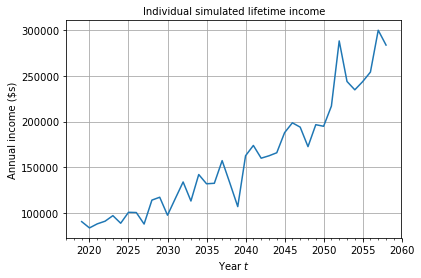

In [5]:
# Ploting one of the lifetime income path
%matplotlib inline
p = simulation_profile
year_vector = np.arange(p['start_year'], p['start_year'] + p['working_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vector, income_matrix[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

# 2. Plotting a histogram

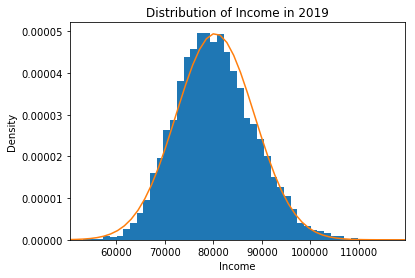

In [6]:
income_2019 = income_matrix[0, :]
average = np.mean(income_2019)
stdev = np.sqrt(np.var(income_2019))

# Plotting a histogram
%matplotlib inline
plt.hist(income_2019, 50, normed = True)
plt.xlim((min(income_2019)), max(income_2019))
x = np.linspace(min(income_2019), max(income_2019), 50)
plt.plot(x, mlab.normpdf(x, average, stdev))
plt.xlabel(r'Income')
plt.ylabel(r'Density')
plt.title('Distribution of Income in 2019')

The histogram is approximately normally distributed.

In [7]:
def percentage_above_and_below(p, income_matrix, upper = 100000, lower = 70000):
    
    above = 0
    below = 0
    
    # Counting the number of income above and below the given numbers
    for income in income_matrix[0]:
        if income > upper:
            above += 1
        elif income < lower:
            below += 1
    
    print("Above $" + str(upper) + " : " + str(100 * above / len(income_matrix[0])) + "%")
    print("Below $" + str(lower) + ": " + str(100 * below / len(income_matrix[0])) + "%")
    
    return None

In [8]:
percentage_above_and_below(simulation_profile, income_matrix)

Above $100000 : 1.27%
Below $70000: 9.02%


# 3. Computing pay off years

In [9]:
def pay_off_simulation(p, income_matrix):
    
    # Initializing matrix with zeros
    pay_off_matrix = np.zeros((p['working_years'], p['number_of_draws']))
    
    # Summing the pay off amounts for each year
    for year in range(p['working_years']):
        if year == 0:
            pay_off_matrix[year, :] = income_matrix[year, :] * p['pay_off_rate']
        else:
            pay_off_matrix[year, :] = pay_off_matrix[year -1, :] +\
                                      income_matrix[year, :] * p['pay_off_rate']
    
    return pay_off_matrix

In [10]:
pay_off_matrix = pay_off_simulation(simulation_profile, income_matrix)

In [11]:
def find_pay_off_year(p, pay_off_matrix):
    
    years_list = []
    
    # Finding pay off finish year
    for individual in range(p['number_of_draws']):
        year = 1
        
        for pay_off in pay_off_matrix[:, individual]:
            if pay_off > p['loan_amount']:
                years_list.append(year)
                break
            year += 1
    
    return years_list

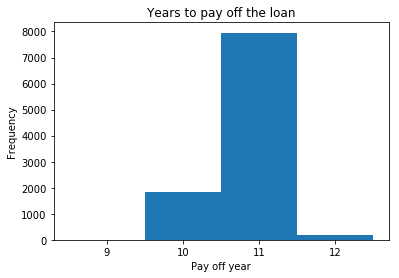

In [12]:
years_list = find_pay_off_year(simulation_profile, pay_off_matrix)

# Plotting pay off years
%matplotlib inline
plt.hist(years_list, bins = np.arange(min(years_list) - 0.5, max(years_list) + 1.5))
plt.xticks(np.arange(min(years_list), max(years_list) + 0.5))
plt.xlabel(r'Pay off year')
plt.ylabel(r'Frequency')
plt.title('Years to pay off the loan')

In [13]:
def pay_off_on_or_before(p, years_list, target_year):
    
    counter = 0
    
    # Counting the number of individuals that finished pay off on or before the target year
    for year in years_list:
        if year <= target_year:
            counter += 1
    
    print("Pay off on or before year " + str(target_year) + " : " +\
          str(100 * counter / p['number_of_draws']) + "%")
    
    return None

In [14]:
pay_off_on_or_before(simulation_profile, years_list, 10)

Pay off on or before year 10 : 18.47%


# 4. Simulating with different parameters

In [15]:
new_simulation_profile = {
    'starting_income'    : 85000,  # Starting income changed
    'growth_rate'        : 0.03,
    'mu'                 : 0,
    'sigma'              : 0.15,   # Standard deviation changed
    'rho'                : 0.2,
    'start_year'         : 2019,
    'working_years'      : 40,
    'number_of_draws'    : 10000,
    'loan_amount'        : 95000,
    'pay_off_rate'       : 0.1,
    'seed'               : 524,
    }

In [16]:
new_income_matrix = normal_income_simulation(new_simulation_profile)

In [17]:
new_pay_off_matrix = pay_off_simulation(new_simulation_profile, new_income_matrix)

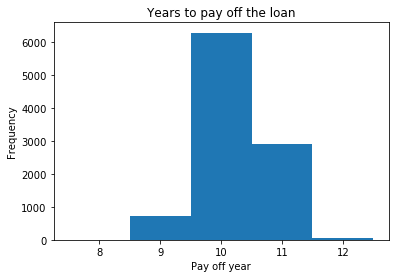

In [18]:
new_years_list = find_pay_off_year(new_simulation_profile, new_pay_off_matrix)

# Plotting new pay off years
%matplotlib inline
plt.hist(new_years_list, bins = np.arange(min(new_years_list) - 0.5, max(new_years_list) + 1.5))
plt.xticks(np.arange(min(new_years_list), max(new_years_list) + 0.5))
plt.xlabel(r'Pay off year')
plt.ylabel(r'Frequency')
plt.title('Years to pay off the loan')

In [19]:
pay_off_on_or_before(new_simulation_profile, new_years_list, 10)

Pay off on or before year 10 : 70.2%
